## Justin Richling
## 09/20/18

## Imports

In [2]:
from satpy import Scene, DatasetID
import glob
from satpy.multiscene import MultiScene
from satpy.writers import get_enhanced_image

In [3]:
# Random Library Imports
import os,glob,time

# Importing Datetime Libraries
from datetime import datetime, date

# CartoPy Map Plotting Libraires
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Numerical and Scientific Libraries
import numpy as np

from scipy.ndimage import gaussian_filter

# NetCDF Libraries
from netCDF4 import Dataset

# Matplotlib Plotting Libraries
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm, Normalize
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import patheffects

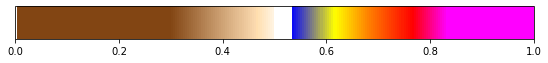

In [4]:
import pandas as pd

ps = pd.read_csv("/Users/chowdahead/Desktop/swd_colorbar.csv")

swd_colors = []
for i in range(0,2048):
    swd_colors.append((float(ps["r"][i]),
                           float(ps["g"][i]),
                           float(ps["b"][i]),
                           float(ps["a"][i])
                         ))

cmap_name="split_window_diff"
swd_cmap = LinearSegmentedColormap.from_list(
        cmap_name, swd_colors)

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=swd_cmap,
                                orientation='horizontal')


In [39]:
# Unidata/MetPy Dictionary of GOES channels

channel_list = {1:u'1 - Blue Band 0.47 \u03BCm',
                2:u'2 - Red Band 0.64 \u03BCm',
                3:u'3 - Veggie Band 0.86 \u03BCm',
                4:u'4 - Cirrus Band 1.37 \u03BCm',
                5:u'5 - Snow/Ice Band 1.6 \u03BCm',
                6:u'6 - Cloud Particle Size Band 2.2 \u03BCm',
                7:u'7 - Shortwave Window Band 3.9 \u03BCm',
                8:u'8 - Upper-Level Tropo. WV Band 6.2 \u03BCm',
                9:u'9 - Mid-Level Tropo. WV Band 6.9 \u03BCm',
                10:u'10 - Low-Level WV Band 7.3 \u03BCm',
                11:u'11 - Cloud-Top Phase Band 8.4 \u03BCm',
                12:u'12 - Ozone Band 9.6 \u03BCm',
                13:u'13 - Clean IR Longwave Band 10.3 \u03BCm',
                14:u'14 - IR Longwave Band 11.2 \u03BCm',
                15:u'15 - Dirty Longwave Band 12.3 \u03BCm',
                16:u'16 - CO2 Longwave IR 13.3 \u03BCm'}

In [40]:
channel_list[16]

'16 - CO2 Longwave IR 13.3 μm'

In [6]:
# Where the data is supposed to be

GOES_sample_path = '/Users/chowdahead/Downloads/WX_Data/GOES_Data/Dust/'

print("Data path:",GOES_sample_path)


Data path: /Users/chowdahead/Downloads/WX_Data/GOES_Data/Dust/


# --------------------------------------------------------------------------------------------

# Populate the Lists for Different Channels

In [7]:
# Check to make sure the data went to the right path
GOES_sample_path

'/Users/chowdahead/Downloads/WX_Data/GOES_Data/Dust/'

In [8]:
os.chdir(GOES_sample_path)

In [9]:
pwd

'/Users/chowdahead/Downloads/WX_Data/GOES_Data/Dust'

In [11]:
scn = Scene(reader='abi_l1b', filenames=glob.glob("/Users/chowdahead/Downloads/WX_Data/GOES_Data/OR_ABI-L1b-RadC-*.nc"))

scn.load(["dust"])

new_scn = scn.resample(scn.min_area(), resampler='native')
    
var = get_enhanced_image(new_scn["dust"]).data
    # Get true color data to use later and reorder the dimensions so matplotlib can use the image
    # Sadly, this operation is not lazy (bad performance) in xarray at the time of writing
var = var.transpose('y', 'x', 'bands')
    
abi_crs = var.attrs['area'].to_cartopy_crs()

In [12]:
GOES16_samples_9 = []
for name in glob.glob(f"{GOES_sample_path}00/2/*L2*.nc"):
    GOES16_samples_9.append(name)
    GOES16_samples_9 = sorted(GOES16_samples_9)
  
nc13 = Dataset(GOES16_samples_9[0])
nc15 = Dataset(GOES16_samples_9[1])

ch13 = nc13.variables['CMI'][:]
ch15 = nc15.variables['CMI'][:]
red = ch15-ch13
red.min(),red.max()
#ch13 = nc13.variables['Rad'][:]
#ch15 = nc15.variables['Rad'][:]

(-21.49228, 2.0160522)

In [13]:
hour = "00"
i = 2

In [14]:
GOES16_samples_9 = []
for name in glob.glob(f"{GOES_sample_path}{hour}/{i}/*L2*.nc"):
    #for name in glob.glob(f"{GOES_sample_path}/*L2*.nc"):
    #for name in glob.glob(f"{GOES_sample_path}{hour}/{i}/*.nc"):
    GOES16_samples_9.append(name)
    GOES16_samples_9 = sorted(GOES16_samples_9)
  
nc13 = Dataset(GOES16_samples_9[0])
nc15 = Dataset(GOES16_samples_9[1])

    #ch13 = nc13.variables['Rad'][:]
    #ch15 = nc15.variables['Rad'][:]
ch13 = nc13.variables['CMI'][:]
ch15 = nc15.variables['CMI'][:]

In [15]:
list(GOES16_samples_9)

['/Users/chowdahead/Downloads/WX_Data/GOES_Data/Dust/00/2/OR_ABI-L2-CMIPC-M3C13_G16_s20182150002240_e20182150005025_c20182150005064.nc',
 '/Users/chowdahead/Downloads/WX_Data/GOES_Data/Dust/00/2/OR_ABI-L2-CMIPC-M3C15_G16_s20182150002240_e20182150005019_c20182150005086.nc']

In [42]:
def GOES_RGB(i,hour,extent=[-114,-109,31,36]):
    
    
    
    GOES16_samples_9 = []
    for name in glob.glob(f"{GOES_sample_path}{hour}/{i}/*L2*.nc"):
    #for name in glob.glob(f"{GOES_sample_path}/*L2*.nc"):
    #for name in glob.glob(f"{GOES_sample_path}{hour}/{i}/*.nc"):
        GOES16_samples_9.append(name)
        GOES16_samples_9 = sorted(GOES16_samples_9)
  
    #nc13 = Dataset(GOES16_samples_9[1])
    #nc15 = Dataset(GOES16_samples_9[3])
    nc13 = Dataset(GOES16_samples_9[0])
    nc15 = Dataset(GOES16_samples_9[1])

    #ch13 = nc13.variables['Rad'][:]
    #ch15 = nc15.variables['Rad'][:]
    ch13 = nc13.variables['CMI'][:]
    ch15 = nc15.variables['CMI'][:]

    swd = ch15-ch13
    print(swd.min(),swd.max())
    #red2 = gaussian_filter(red,3)
    #red = ch15-ch13
    #red = np.clip(red,0,1)
    
    fig = plt.figure(figsize=(10, 10), dpi = 200)
    
    sat_h = nc13.variables['goes_imager_projection'].perspective_point_height

    # The projection x and y coordinates equals
    # the scanning angle (in radians) multiplied by 
    # the satellite height (http://proj4.org/projections/geos.html)
    X = nc13.variables['x'][:] * sat_h
    Y = nc13.variables['y'][:] * sat_h
    
    # Add the map and set the extent
    ax = plt.subplot(111, projection=abi_crs) 
    ax.set_extent(extent,ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='k')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k')

#vmin=-25,vmax=5

    import matplotlib as mpl
    import matplotlib.colors as colors
    #midnorm = MidpointNormalize(vmin=-500., vcenter=0, vmax=4000)
    divnorm = colors.DivergingNorm(vmin=-1., vcenter=0, vmax=15)
    #norm=colors.PowerNorm(gamma=9)
    norm = mpl.colors.Normalize(vmin=-20.,vmax=3.)
    im = ax.imshow(swd, cmap=swd_cmap,transform=abi_crs,interpolation="nearest",
                    extent=(X.min(), X.max(), Y.min(), Y.max()),origin='upper',)
                    #norm=divnorm)#vmax=3, vmin=-15)#,norm=divnorm)
    
    ticks = np.arange(-22,3,6)
    outline_effect = [patheffects.withStroke(linewidth=3, foreground='black')]
    outline_effect2 = [patheffects.withStroke(linewidth=2, foreground='w')]

    cbar = plt.colorbar(im,orientation="horizontal") #,ticks=ticks
    posn = ax.get_position()
    cbar.ax.set_position([posn.x0+0.001, posn.y0-0.001,
                            (posn.x1-posn.x0)/2, posn.height])
    '''
    cbar.set_ticks([])
    cbar.ax.set_xticklabels([])
    Y = -10
    cbar.ax.text(-20, Y, 20, ha='center', va='center',path_effects=outline_effect,color="w") #RF
    cbar.ax.text(-16, Y, ticks[1], ha='center', va='center',path_effects=outline_effect,color="w") #-20
    cbar.ax.text(-10, Y, ticks[2], ha='center', va='center',path_effects=outline_effect,color="w")#20
    cbar.ax.text(-4, Y, ticks[3], ha='center', va='center',path_effects=outline_effect,color="w")#45
    cbar.ax.text(0, Y, 0, ha='center', va='center',path_effects=outline_effect,color="w")
    cbar.ax.text(2, Y, ticks[4], ha='center', va='center',path_effects=outline_effect,color="w")#80
    #cbar.ax.text(5, Y, ticks[6], ha='center', va='center',path_effects=outline_effect,color="w")#80
    '''

    #ax.scatter(-112.0740,33.4484,marker="*",transform=ccrs.PlateCarree(),c="k",s=100,zorder=100,
    #          path_effects=outline_effect2)
    ax.text(-112.0740,33.4484,s="*",transform=ccrs.PlateCarree(),c="k",zorder=100,
              path_effects=outline_effect2,fontsize=20,fontweight="bold")
    timez = ((nc13.time_coverage_start).replace('T',' ')).replace('Z','')
    date_time_obj = datetime.strptime(timez, '%Y-%m-%d %H:%M:%S.%f')
    text_time = ax.text(.995, 0.01, 
            "{0:%d-%b-%Y %H%MZ}".format(date_time_obj),
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=10, weight='bold')

    text_time.set_path_effects(outline_effect)

    #plt.savefig(f"/Users/chowdahead/Desktop/Dust_RGB/{hour}_{i}.png",bbox_inches="tight",dpi=fig.dpi)
    #plt.close()
    plt.show()

In [38]:
product = "dust"
for j in ["00","01","02"]:
#for j in ["00"]:
    for i in range(2,62,5):
        #filenames = glob.glob(f'/Users/chowdahead/Downloads/GOES_Data/Dust/02/{i}/*ABI-L1b*.nc')
        GOES_RGB(i,j,extent=[-114,-109,31,36])
        #GOES_RGB(i,j,extent=[-120,-70,25,60])
        print("next...")

-2.0160522 21.49228
next...
-1.1094666 24.574738
next...
-1.0183105 23.961609
next...
-1.569519 22.319519
next...
-2.5989685 21.478256
next...
-1.7131348 23.469147
next...
-1.8539734 21.048798
next...
-1.8435059 21.507477
next...
-1.0782776 22.188019
next...
-1.197113 22.204865
next...
-0.9251404 22.0943
next...
-0.9906311 20.721619
next...
-0.9039612 21.053497
next...
-1.5414734 20.934265
next...
-1.3409424 21.504578
next...
-1.3863983 26.637054
next...
-0.9148865 26.62027
next...
-1.6062622 25.621857
next...
-1.0041504 25.273956
next...
-1.3642883 24.8844
next...
-1.0959778 24.946747
next...
-1.3388672 24.111908
next...
-1.3173523 27.059784
next...
-1.2594757 26.709991
next...
-0.85668945 24.68158
next...
-0.907074 21.45169
next...
-0.9559326 21.020996
next...
-1.5454102 21.450195
next...
-0.89068604 20.695007
next...
-0.8869324 19.901001
next...
-0.8994446 19.858734
next...
-1.9233398 20.332428
next...
-0.8609009 19.024109
next...
-2.5611572 19.736969
next...
-1.711792 23.41867
next

-21.49228 2.0160522


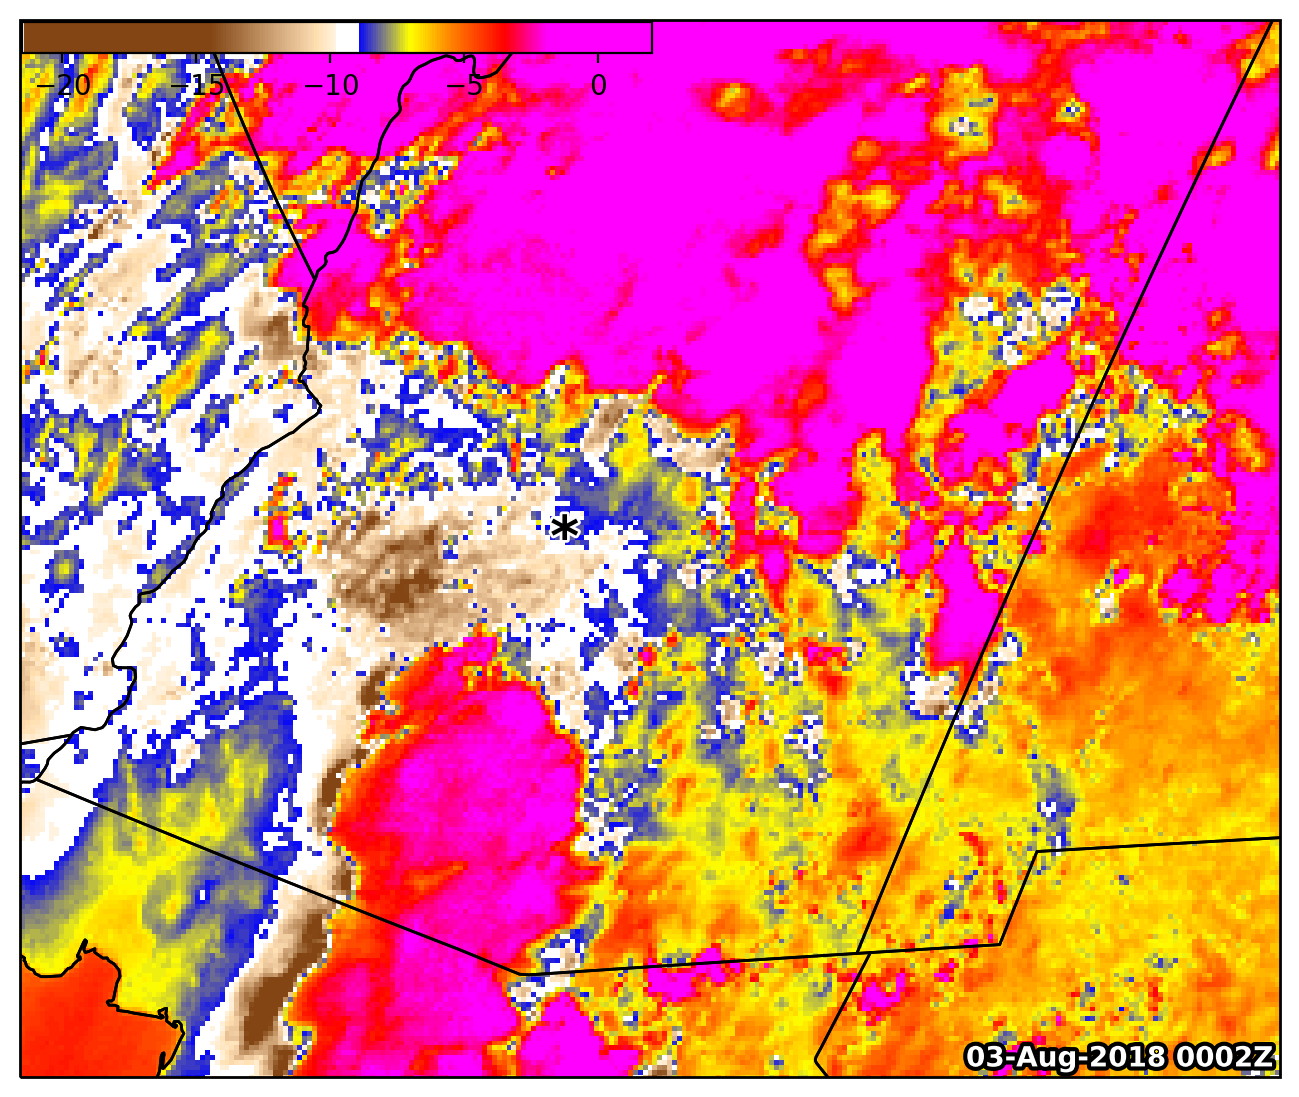

In [43]:
GOES_RGB(2,"00",extent=[-114,-109,31,36])#[-120,-70,20,55][-114,-109,31,36]